In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import networkx as nx

## Review of MDP's

### Setup
In a markov decision problem we have a set of states $S$, a set of actions $A$, a transition probability function $P$, and a reward function $R$. An agent takes actions, which then lead to transitions in state. Each state-action pair is associated with a reward. The transition function outputs the probability of arrivingt in a given state as a result of being in a given state and applying a given action.

We want to find an optimal policy $\pi$ of what action to apply in each state. To do this we use the following, called the Bellman Equations:

$$Q^\pi(s,a) = r(s,a) + \beta \sum_\hat{s} P(\hat{s} | s, a) V^\pi(\hat{s}) $$

$$V^\pi(s) = Q^\pi(s,\pi(s)) $$

Here $V^\pi(s)$ is called the value function, $Q^\pi$ is called the state-action value function, and $\beta$ is a discount between 0 and 1. The second equation says the value of being in $s$ is given by the state-action value of being in state $s$ and taking action $\pi(s)$. The first equation says that the value of being in a state and applying an action is the immediate reward plus the expectation over the value of your future state, $\hat{s}$.

Given values for $Q$ we can work out the value of $V$ *if* you have the optimal policy:

$$V(s) = \max_a Q(s,a) $$

This means we can then remove $Q$ and just state $V(s)$ as:

$$V(s) = \max_a r(s,a) + \beta \sum_\hat{s} P(\hat{s} | s, a) V(\hat{s}) $$

This is what will be true for the optimal value of $\pi$.

We can turn this function into a contraction mapping $T$:

$$T(V(s)) = \max_a r(s,a) + \beta \sum_\hat{s} P(\hat{s} | s, a) V(\hat{s}) $$

### Contraction mappings

This is a type of function (going from $V$ to $V$) which is called a contraction mapping. A function $T$ on a metric space $X$ is a contraction mapping if 

$$d(T(x),T(y))\leq \alpha d(x,y) \text{ for all } x,y \in X$$

and $0\geq\alpha<1$ 

There is then a single point $x$ for which $T(x)=x$.

Proof: consider there are two points $x$ and $y$ for which $T(x)=x$ and $T(y)=y$. By definition: 

$$d(T(x),T(y))\leq \alpha d(x,y)$$ 

which means 

$$d(x,y)\leq \alpha d(x,y)$$

$$(1 - \alpha) d(x,y) \leq 0$$

And as $0\geq\alpha<1$:

$$d(x,y) = 0$$

Secondly, the function $T$ converges to this point $x$. Consider if I start off in position $y$. By definition:

$$d(T(x),T(y))\leq \alpha d(x,y)$$ 

Which means:

$$d(x,T(y))\leq \alpha d(x,y)$$ 

So $T(y)$ is closer to $x$ than $y$. 

### Showing the bellman equation is a contraction:

We will use the suprenum norm as our distance, which takes the maximum absolute difference across all dimensions (states in this case).

To get the absolute difference for a state in the case of the bellman function we can see:

$$|(T(V_1(s)),T(V_2(s))|=\max_a \left[ r(s,a) + \beta \sum_\hat{s} P(\hat{s} | s, a) V_1(\hat{s}) \right] - \max_a \left[ r(s,a) + \beta \sum_\hat{s} P(\hat{s} | s, a) V_2(\hat{s}) \right] $$

Note $\max (a+b) \leq \max(a) + \max(b)$. Therefore we can rewrite:

$$|(T(V_1(s)),T(V_2(s))|\leq\left[\max_a r(s,a) + \max_a \beta \sum_\hat{s} P(\hat{s} | s, a) V_1(\hat{s}) \right] - \left[ \max_a r(s,a) + \max_a \beta \sum_\hat{s} P(\hat{s} | s, a) V_2(\hat{s}) \right] $$

Cancelling out the $\max_a r(s,a)$, pulling $\beta$ in front:

$$|(T(V_1(s)),T(V_2(s))|\leq \beta \left[\max_a \sum_\hat{s} P(\hat{s} | s, a) V_1(\hat{s}) - \max_a \sum_\hat{s} P(\hat{s} | s, a) V_2(\hat{s}) \right] $$

Finally, we use the inequality $|\max_x f(x)| - |\max_x g(x)|\leq \max_x|f(x)-g(x)|$. Why? Say $\max_x g(x)$ is bigger than $\max_x f(x)$. Let the value of $x$ at $\max_x g(x)$ be denoted $x_g$. By definition of maximum $\max_x f(x)\geq f(x_g)$. And the only way to shrink the absolute difference would be if $f(x_g)$ was *greater* than $\max_x f(x)$, which can't happen. So:

$$|(T(V_1(s)),T(V_2(s))|\leq \beta \max_a \sum_\hat{s} P(\hat{s} | s, a)|V_1(\hat{s}) - V_2(\hat{s})| $$

Say the suprenum norm $d(V_1,V_2)=l$.

Then at best $d(T(V_1),T(V_2))=\beta l$. 

Why? If $l$ is the largest absolute difference, then all the values of $|V_1(\hat{s})-V_2(\hat{s})|$ are at most $l$. And the expectation over $P(\hat{s} | s, a)$ is also then at most $l$. 

And as $\beta$ is always less than 1 this means $d(T(V_1),T(V_2))<d(V_1,V_2)$. So the bellman update function above is a contraction mapping.

### Wrapping it together

Because the bellman equation $V(s) = \max_a r(s,a) + \beta \sum_\hat{s} P(\hat{s} | s, a) V(\hat{s}) $ will be true at the optimum, and because $T$ is a contraction mapping, we have a proceedure to calculate the value function by simply appying $T$ again and again.

Here is an example where you are playing go-karts and trying to pass someone else.  

In [3]:
states = ["left_back","right_back","right_mid","left_forward","right_forward","crashed"]

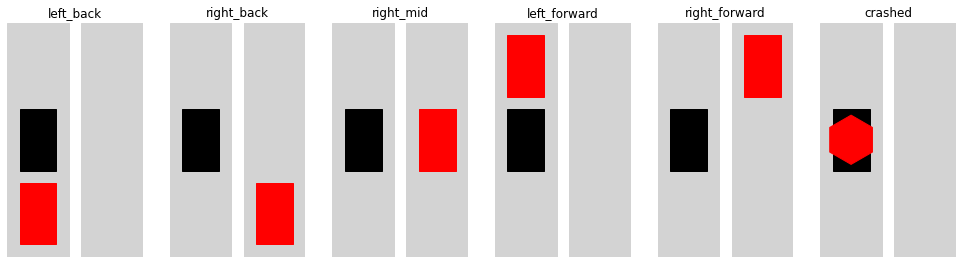

In [6]:
# plot the state of a kart trying to pass:
def plot_passing_state(current_state,ax):
    road1 = patches.Rectangle((6, 0), 5, 19, linewidth=1, edgecolor='lightgray', facecolor='lightgray')
    road2 = patches.Rectangle((0, 0), 5, 19, linewidth=1, edgecolor='lightgray', facecolor='lightgray')
    ax.add_patch(road1)
    ax.add_patch(road2)
    car1 = patches.Rectangle((1, 7), 3, 5, linewidth=1, edgecolor='black', facecolor='black')
    ax.add_patch(car1)
    if(current_state=="crashed"):
        crash = patches.RegularPolygon((2.5, 9.5), numVertices=6, radius=2,color="red")
        ax.add_patch(crash)
    else:
        car2_x = {"left":1,"right":7}[current_state.split("_")[0]]
        car2_y = {"back":1,"mid":7,"forward":13}[current_state.split("_")[1]]
        car2 = patches.Rectangle((car2_x, car2_y), 3, 5, linewidth=1, edgecolor='red', facecolor='red')
        ax.add_patch(car2)
    ax.set_xlim(0, 11)
    ax.set_ylim(0, 19)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(current_state)

fig, axes = plt.subplots(1,6,figsize=(17, 6))
for s in range(len(states)):
    plot_passing_state(states[s],axes[s])
plt.show()

In [7]:
actions = ["left","right","forward","back","stay_put"]

# making the transition matrix for each action.
# when you try going forward or backward you might go left or right instead. 

go_left_T_dict = {
    "left_back":{"crashed":1}, # you drove off the road
    "right_back":{"left_back":1},
    "right_mid":{"crashed":1},
    "left_forward":{"left_back":1}, # reset if you get to left_forward
    "right_forward":{"left_forward":1},
    "crashed":{"left_back":1} # crash so reset
}

go_right_T_dict = {
    "left_back":{"right_back":1},
    "right_back":{"crashed":1},
    "right_mid":{"crashed":1},
    "left_forward":{"left_back":1},
    "right_forward":{"crashed":1},
    "crashed":{"left_back":1}
}

go_forward_T_dict = {
    "left_back":{"crashed":0.9,"right_back":0.1}, # chance you drive left + change you go forward & crash = 90%.  
    "right_back":{"right_mid":0.8,"left_back":0.1,"crashed":0.1}, # aim forward, might go left / right. 
    "right_mid":{"right_forward":0.8,"crashed":0.2}, # chance of smaking into the left car / off the right
    "left_forward":{"left_back":1},
    "right_forward":{"right_forward":0.8,"left_forward":0.1,"crashed":0.1},
    "crashed":{"left_back":1}
}

go_back_T_dict = {
    "left_back":{"left_back":0.8,"right_back":0.1,"crashed":0.1},
    "right_back":{"right_back":0.8,"left_back":0.1,"crashed":0.1},
    "right_mid":{"right_back":0.8,"crashed":0.2},
    "left_forward":{"left_back":1},
    "right_forward":{"right_mid":0.8,"left_forward":0.1,"crashed":0.1},
    "crashed":{"left_back":1}
}

stay_put_T_dict = {
    "left_back":{"left_back":1},
    "right_back":{"right_back":1},
    "right_mid":{"right_mid":1},
    "left_forward":{"left_back":1},
    "right_forward":{"right_forward":1},
    "crashed":{"left_back":1}
}

transition_matrix = np.zeros((5, 6, 6)) # 5 actions, 6 possible current states, 6 possible new states
state_index = {state: i for i, state in enumerate(states)}
all_action_transitions = [go_left_T_dict,go_right_T_dict,go_forward_T_dict,go_back_T_dict,stay_put_T_dict]
for i,action_dict in enumerate(all_action_transitions):
    for current_state, new_states in action_dict.items():
        for next_state, prob in new_states.items():
            transition_matrix[i, state_index[current_state], state_index[next_state]] = prob

In [29]:
# big loss for crashing, some reward for winning. Note: here the reward doesn't depend on the action. 
reward = np.array([0,0,0,100,0,-100])
beta = 0.99

V = np.random.rand(6) # start with a random matrix
for iteration in range(1000):
    # get the value of being in each state and applying each action.
    # this means summing over the value of the new states times the probability of those new states
    expected_future_values = beta * np.sum(transition_matrix*V.reshape(1,1,-1),axis=2)
    V = np.max(expected_future_values + reward.reshape(1,-1),axis=0)

best_actions = [actions[a] for a in np.argmax(expected_future_values, axis=0)]
for s in range(6):
    print(states[s],best_actions[s])

left_back right
right_back forward
right_mid forward
left_forward left
right_forward left
crashed left


Showing the results:

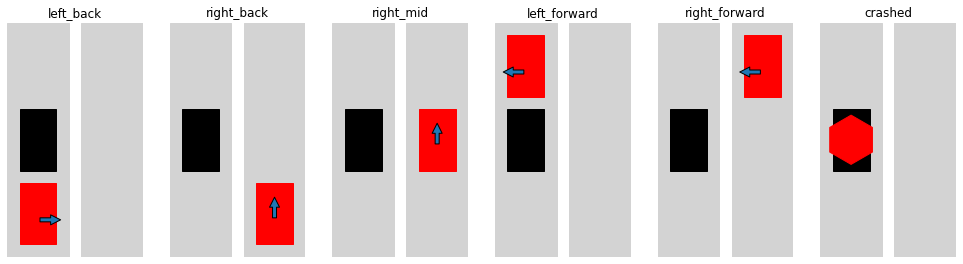

In [30]:
def plot_action(current_state,action,ax):
    if not current_state=="crashed":
        arrow_x = {"left":2.5,"right":8.5}[current_state.split("_")[0]]
        arrow_y = {"back":3,"mid":9,"forward":15}[current_state.split("_")[1]]
        if action == "right":
            arrow = patches.FancyArrowPatch((arrow_x,arrow_y), (arrow_x+2,arrow_y),mutation_scale=20)
        if action == "left":
            arrow = patches.FancyArrowPatch((arrow_x,arrow_y), (arrow_x-2,arrow_y),mutation_scale=20)
        if action == "forward":
            arrow = patches.FancyArrowPatch((arrow_x,arrow_y), (arrow_x,arrow_y+2),mutation_scale=20)
        if action == "back":
            arrow = patches.FancyArrowPatch((arrow_x,arrow_y), (arrow_x+2,arrow_y-2),mutation_scale=20)
        ax.add_patch(arrow)
    
fig, axes = plt.subplots(1,6,figsize=(17, 6))
for s in range(len(states)):
    plot_passing_state(states[s],axes[s])
    plot_action(states[s],best_actions[s],axes[s])
plt.show()